In [ ]:
!pip install scipy

# Overview

## Filter
Using convolution with a filter on a grayscale image, you can detect edges in an image. The value which is displayed in a grayscale image is the intensity (Helligkeit).
- Sobel → first derivative of the image (detects edges; partial derivative in x and y direction → sobel_x filter for vertical edges and sobel_y for horizontal edges)
- LaPlace → second derivative of the image (detects strong changes in intensity → often edges or corners)
- Gaussian → smoothing with a gaussian function

## Filter combinations

- Laplacian of Gaussian (LoG) = Laplace after Gauss
- Canny =
  1. smoothing (Gaussian)
  2. calculate gradients (Sobel Filter)
  3. Non-Maximum Suppression → thins out edges
  4. Hysteresis threshold → to select strong / weak edges


<a>
  <img src="../images/Effect-of-three-different-edge-detection-filters-Laplacian-Canny-and-Sobel-filters.png" alt="Pinhole camera" width="480" style="background-color: white;padding: 10px;">
</a>

<a href="https://www.youtube.com/watch?v=uNP6ZwQ3r6A" target="_blank">
<img src="https://img.youtube.com/vi/uNP6ZwQ3r6A/maxresdefault.jpg" alt="Simple Stereo" width="500">
</a>

# Sobel

# LaPlace

Für eine Funktion f(x, y) im 2D-Raum ist der Laplace-Operator definiert als:
$$\Delta f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}$$

In 3D:

$$\Delta f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2} + \frac{\partial^2 f}{\partial z^2}$$

---- 
✅ Der Gradient einer Funktion liefert einen Vektor, der die Richtung und Stärke des größten Anstiegs beschreibt. Das ist die erste Ableitung.

✅ Der Laplace-Operator ist die Summe der zweiten partiellen Ableitungen, also ein Maß dafür, wie stark die Funktion in alle Richtungen “gekrümmt” ist.

Man sagt:

$\Delta f = \nabla \cdot \nabla f = \text{div}(\text{grad}(f))$

Das heißt:
- Du bildest zuerst den Gradient (erste Ableitungen → Vektor).
- Dann nimmst du die Divergenz dieses Gradienten (Summe der partiellen Ableitungen der Gradienten-Komponenten).

Fazit:
Der Laplace-Operator ist also nicht der “zweite Gradient”, sondern die Divergenz des Gradienten, was in Summe die Summe der zweiten Ableitungen ergibt.



In der Bildverarbeitung wird der diskrete Laplace-Operator oft als Filter-Maske angewandt, um Kanten oder schnelle Helligkeitswechsel zu erkennen:

Typische Filter-Matrix (3x3):

$$\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}$$

# Gaussian

### 1D Gaussian function

<a>
  <img src="../images/1D_gaussian_function.png" alt="Pinhole camera" width="500" style="background-color: white;padding: 10px;">
</a>

Anhand der 1D Gaussfunktion sollen die Effekte der einzelnen Parameter untersucht werden.

- $ A $ ändert die Höhe

- $ \mu $ verschiebt den Ursprung

- $ \sigma $ verändert die Breite der Glocken/Gausskurve (Standarabweichung)


### 2D Gaussian function

The 2D Gaussian function is given by: 
$$G(x, y) = A \cdot \exp\left( -\left( \frac{(x - x_0)^2}{2\sigma_x^2} + \frac{(y - y_0)^2}{2\sigma_y^2} \right) \right)$$

Where:
- $A$ = Amplitude (peak value)
- $(x_0, y_0)$ = Center of the Gaussian
- $\sigma_x, \sigma_y$ = Standard deviations in x and y direction

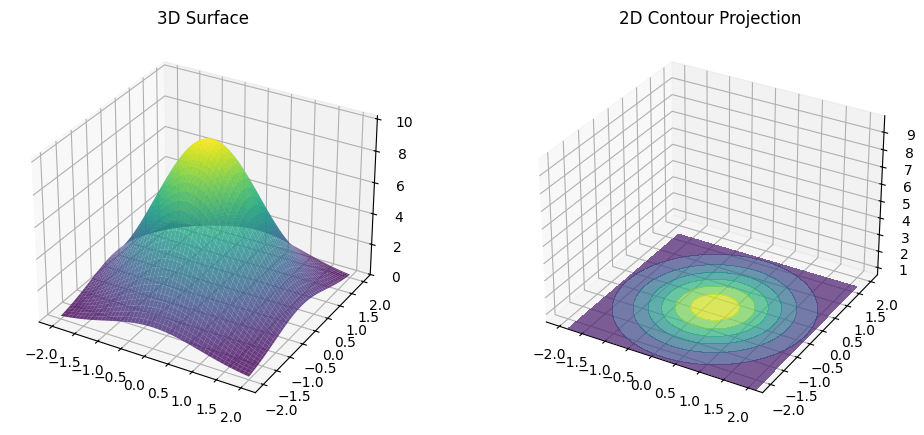

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
A = 10
x0, y0 = 0, 0
sigma_x = 1
sigma_y = 1

# Grid
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# 2D Gaussian
Z = A * np.exp(-(((X - x0)**2) / (2 * sigma_x**2) + ((Y - y0)**2) / (2 * sigma_y**2)))

# Create figure with two subplots
fig = plt.figure(figsize=(12, 5))

# Left: 3D Surface
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title('3D Surface')

# Right: 2D Contour projected onto x-y-plane
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.contourf(X, Y, Z, zdir='z', offset=0, cmap='viridis', alpha=0.7)
ax2.set_title('2D Contour Projection')

plt.show()

# Derivative of Gaussian

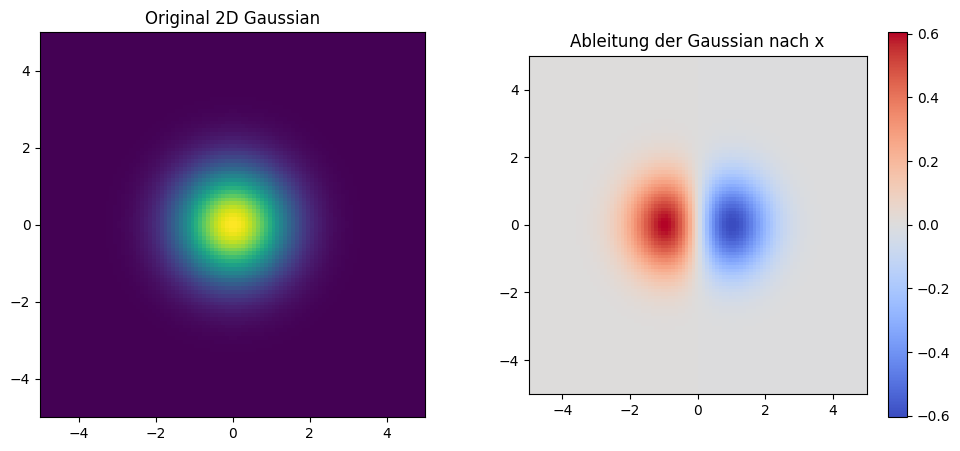

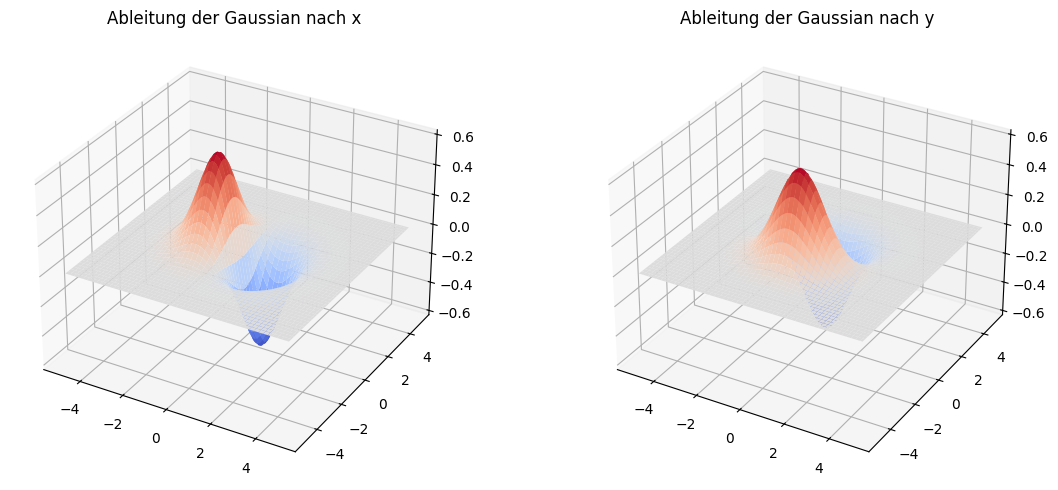

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
sigma = 1
A = 1

# Gitter erzeugen
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# 2D Gaussian
Z = A * np.exp(- (X**2 + Y**2) / (2 * sigma**2))

# Ableitung der Gaussian nach x
dZ_dx = - (X / sigma**2) * Z
dZ_dy = - (Y / sigma**2) * Z

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12,5))

# Original Gaussian
axs[0].imshow(Z, extent=[-5,5,-5,5], origin='lower', cmap='viridis')
axs[0].set_title('Original 2D Gaussian')

# Ableitung nach x
im = axs[1].imshow(dZ_dx, extent=[-5,5,-5,5], origin='lower', cmap='coolwarm')
axs[1].set_title('Ableitung der Gaussian nach x')
plt.colorbar(im, ax=axs[1])
plt.show()

# 3D Plot
fig = plt.figure(figsize=(12, 5))

# 3D Surface Plot der Ableitung nach x
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, dZ_dx, cmap='coolwarm')
ax1.set_title("Ableitung der Gaussian nach x")

# 3D Surface Plot der Ableitung nach y
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot_surface(X, Y, dZ_dy, cmap='coolwarm')
ax2.set_title("Ableitung der Gaussian nach y")

plt.tight_layout()
plt.show()

# LoG (Laplacian of Gaussian)

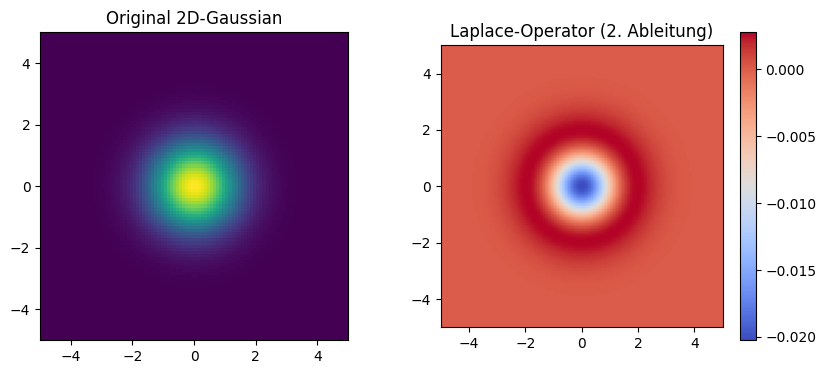

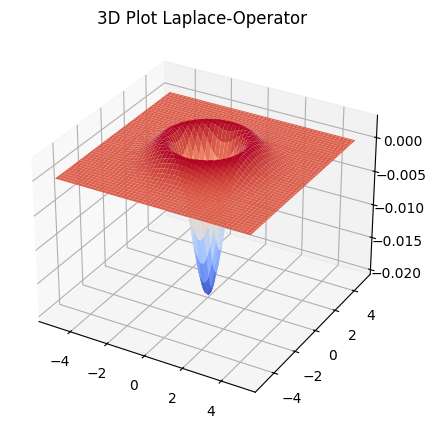

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import laplace

# Gitter erzeugen
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# 2D-Gaussian definieren
sigma = 1
Z = np.exp(-((X)**2 + (Y)**2) / (2 * sigma**2))

# Laplace-Operator anwenden
laplace_Z = laplace(Z)

# 2D Plots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Originalfunktion
axs[0].imshow(Z, extent=(-5, 5, -5, 5), origin='lower', cmap='viridis')
axs[0].set_title("Original 2D-Gaussian")

# Ergebnis nach Laplace-Operator
im = axs[1].imshow(laplace_Z, extent=(-5, 5, -5, 5), origin='lower', cmap='coolwarm')
axs[1].set_title("Laplace-Operator (2. Ableitung)")

plt.colorbar(im, ax=axs[1])
plt.show()

# 3D Plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, laplace_Z, cmap='coolwarm')
ax.set_title("3D Plot Laplace-Operator")
plt.show()